# Gene sets analysis

In this short analysis, we examine the overlaps, redundancy, and coverage of functional gene sets. We analyze the functional gene sets defined by the GSEA team, [json available for download](http://www.gsea-msigdb.org/gsea/msigdb/download_file.jsp?filePath=/msigdb/release/2022.1.Hs/c2.all.v2022.1.Hs.json).

In [13]:
from pathlib import Path
import json
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Overview of gene representation in functional gene sets

In [2]:
with open("data/c2.all.v2022.1.Hs.json", "r") as file:
    data = json.load(file)

print(f"{len(data)=}")
print(f"{list(data.keys())[:5]=}")

len(data)=6449
list(data.keys())[:5]=['ABBUD_LIF_SIGNALING_1_DN', 'ABBUD_LIF_SIGNALING_1_UP', 'ABBUD_LIF_SIGNALING_2_DN', 'ABBUD_LIF_SIGNALING_2_UP', 'ABDELMOHSEN_ELAVL4_TARGETS']


In [3]:
def extract_gene_symbols(gene_set: str, data = data):
    return data[gene_set]["geneSymbols"]

gene_set_names = list(data.keys())
gene_set_collection = []
for name in gene_set_names:
    gene_set_collection.append(
        set(extract_gene_symbols(name))
    )

In [4]:
covered_genes = reduce(lambda x1, x2: set(x1).union(set(x2)), gene_set_collection)
print(f"{len(covered_genes)=}")

counts = {gene: 0 for gene in covered_genes}
for gene in covered_genes:
    for gene_set in gene_set_collection:
        if gene in gene_set:
            counts[gene] += 1

df = pd.DataFrame.from_dict(data=counts, orient="index", columns=["counts"])
df = df.sort_values("counts", ascending=False).reset_index().rename(columns={"index": "external_gene_name"})

len(covered_genes)=22098


In [5]:
df.head(2)

,external_gene_name,counts
0,MAPK1,444
1,MAPK3,415


<AxesSubplot:title={'center':'Sorted number of gene sets in which genes participate.'}, xlabel='Gene rank', ylabel='# gene sets'>

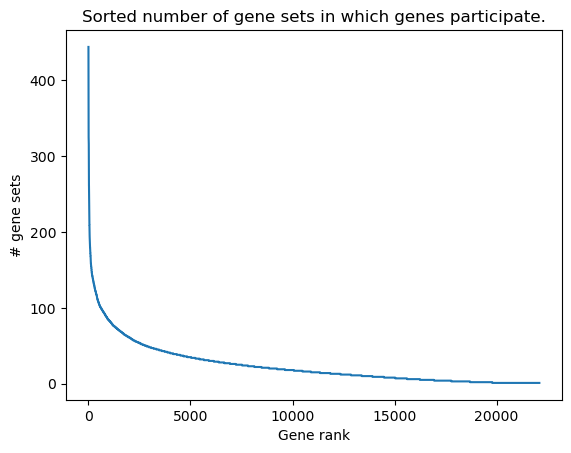

In [6]:
df["counts"].plot(title="Sorted number of gene sets in which genes participate.", xlabel="Gene rank", ylabel="# gene sets")

Representation of cluster 1 and 2 genes in functional gene sets

In [7]:
df_c1 = pd.read_csv("data/df_c1.tsv", sep='\t')
df_c2 = pd.read_csv("data/df_c2.tsv", sep='\t')

df_c1 = pd.merge(df_c1, df, on="external_gene_name", how='left')
df_c2 = pd.merge(df_c2, df, on="external_gene_name", how='left')

<AxesSubplot:>

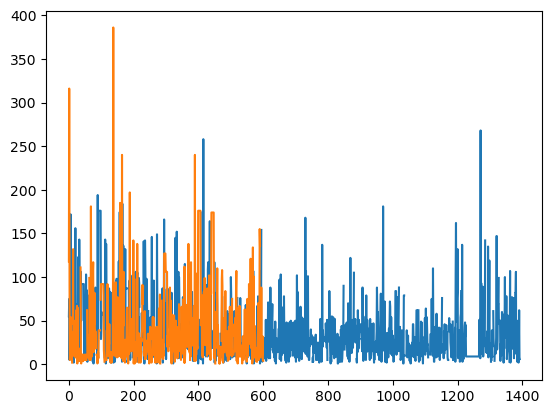

In [8]:
df_c1["counts"].plot()
df_c2["counts"].plot()

<AxesSubplot:xlabel='logFC', ylabel='counts'>

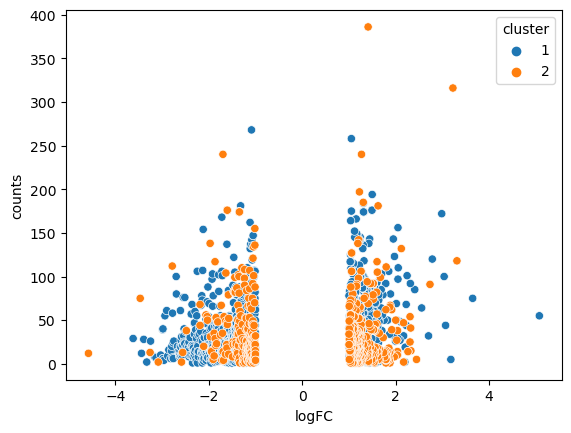

In [14]:
df_c1["cluster"] = "1"
df_c2["cluster"] = "2"
df_c = pd.concat([df_c1, df_c2])

sns.scatterplot(
    data=df_c,
    x="logFC",
    y="counts",
    hue="cluster"
)

In [11]:
from scipy.stats import mannwhitneyu

print(df_c1["counts"].describe(), df_c2["counts"].describe())
print("\n", mannwhitneyu(df_c1["counts"].dropna(), df_c2["counts"].dropna()))

count    1314.000000
mean       37.773212
std        36.530349
min         1.000000
25%        12.000000
50%        26.000000
75%        51.000000
max       268.000000
Name: counts, dtype: float64 count    548.000000
mean      41.191606
std       46.637403
min        1.000000
25%       11.000000
50%       25.000000
75%       53.000000
max      386.000000
Name: counts, dtype: float64

 MannwhitneyuResult(statistic=365330.5, pvalue=0.6165262205314841)


This analysis does not provide evidence that genes in cluster 2 are less represented in the explored functional gene sets.